In [1]:
import datetime
import numpy as np
import pandas as pd
import random
import glob
from scipy.signal import find_peaks
import time

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator

import vasu

l=[]

In [2]:
def read_data(price_file):
	price_data = pd.read_csv(price_file,index_col=0, parse_dates = True,
                             usecols = [u'Date',u'Open Price', u'High Price', u'Low Price', u'Close Price'],
                             dtype= {u'Open Price':np.float64,u'High Price':np.float64,
                                     u'Low Price':np.float64,u'Close Price':np.float64}).sort_index()
	return price_data

            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      133.45      137.65     132.50       135.30    0.000000   
2018-01-02      122.00      122.45     116.10       118.40    0.000000   
2018-01-03      119.20      120.80     116.50       117.45    0.000000   
2018-01-06       72.50       75.30      70.35        73.15    0.000000   
2018-01-08       73.00       73.15      70.70        71.85    0.000000   
2018-01-10       70.10       74.00      65.00        73.35    0.000000   
2018-01-11      107.70      110.20     104.20       108.65    0.000000   
2018-01-15      138.40      138.95     135.35       135.85    0.000000   
2018-01-16      135.80      136.20     129.15       130.55   -0.083141   
2018-01-17      130.50      131.75     126.45       131.25   -0.083141   
2018-01-18      132.25      133.00     125.25       125.95   -0.083141   
2018-01-19      126.50      127.90    

[234 rows x 7 columns]             Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-12-13       66.90       67.70      66.30        66.75         NaN   
2018-12-14       66.50       67.90      65.80        66.60         NaN   
2018-12-17       66.70       68.45      66.50        67.70         NaN   
2018-12-18       67.65       70.15      67.30        69.90         NaN   
2018-12-19       70.20       71.00      69.40        70.10         NaN   
2018-12-20       69.80       71.00      69.25        70.55         NaN   
2018-12-21       71.80       71.90      69.40        69.85         NaN   
2018-12-24       70.05       73.00      69.50        71.25         NaN   
2018-12-26       70.70       71.85      69.25        71.55         NaN   
2018-12-27       72.00       72.40      69.75        70.00         NaN   
2018-12-28       70.05       72.40      70.05        72.05         NaN   
2018-12-31     

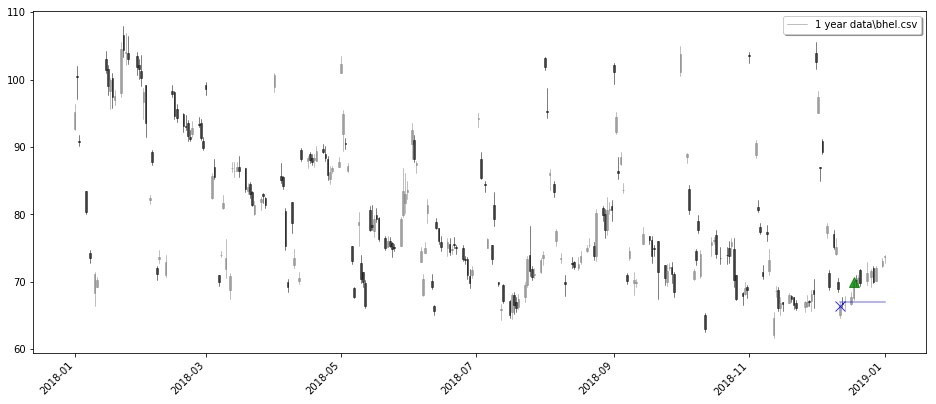

-----------------------------------------------------------------------
-----------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      176.00      176.00     169.00       169.90    0.000000   
2018-01-02      157.00      158.95     152.75       153.50    0.000000   
2018-01-03      115.55      116.80     112.65       113.15    0.000000   
2018-01-06       99.00       99.85      96.20        96.70    0.000000   
2018-01-08       94.00       96.35      93.00        95.35    0.000000   
2018-01-10       76.70       81.20      73.45        79.15    0.000000   
2018-01-11       86.10       87.65      84.90        86.05    0.000000   
2018-01-15      163.10      164.95     162.00       162.40    0.000000   
2018-01-16      162.35      163.00     155.55       156.90    0.000000   
2018-01-17      156.90      165.35     155

[244 rows x 7 columns]             Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-12-28      361.80       369.8      360.2       361.90         NaN   
2018-12-31      361.90       364.8      358.8       362.75         NaN   
2019-01-01      361.05       369.3      360.0       367.20         NaN   

            low_slope          trend  
Date                                  
2018-12-28        NaN  indeterminate  
2018-12-31        NaN  indeterminate  
2019-01-01        NaN  indeterminate  
-----------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      889.00      890.70     875.95       878.70    0.000000   
2018-01-02      982.10     1014.95     969.00       984.90    0.000000   
2018-01-03      943.80      952.45     938.

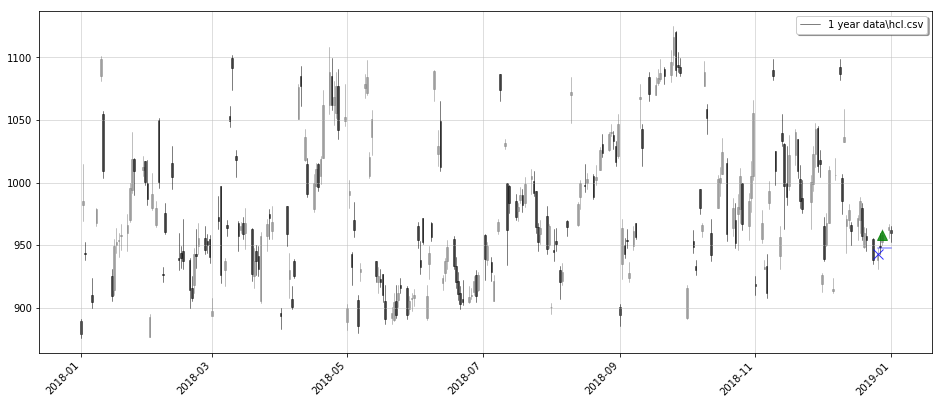

-----------------------------------------------------------------------
-----------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      419.00      421.20     412.40       413.75    0.000000   
2018-01-02      397.30      409.80     390.20       392.35    0.000000   
2018-01-03      377.00      383.10     375.80       376.75    0.000000   
2018-01-06      314.00      316.85     309.05       312.15    0.000000   
2018-01-08      288.90      296.50     273.10       287.35    0.000000   
2018-01-10      250.05      251.00     237.30       243.15    0.000000   
2018-01-11      226.40      234.75     226.40       229.50    0.000000   
2018-01-15      426.00      435.00     425.35       426.05    0.000000   
2018-01-16      426.00      429.55     409.60       410.40   -1.025932   
2018-01-17      408.00      422.05     408

[243 rows x 7 columns]             Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-12-27       94.65        95.0      92.50         93.1         NaN   
2018-12-28       93.80        96.2      93.50         95.2         NaN   
2018-12-31       95.75        96.9      95.05         96.1         NaN   
2019-01-01       96.50        96.5      95.10         96.0         NaN   

            low_slope          trend  
Date                                  
2018-12-27        NaN  indeterminate  
2018-12-28        NaN  indeterminate  
2018-12-31        NaN  indeterminate  
2019-01-01        NaN  indeterminate  
-----------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01     1037.70     1044.50    1030.00      1033.55    0.000000   
2018

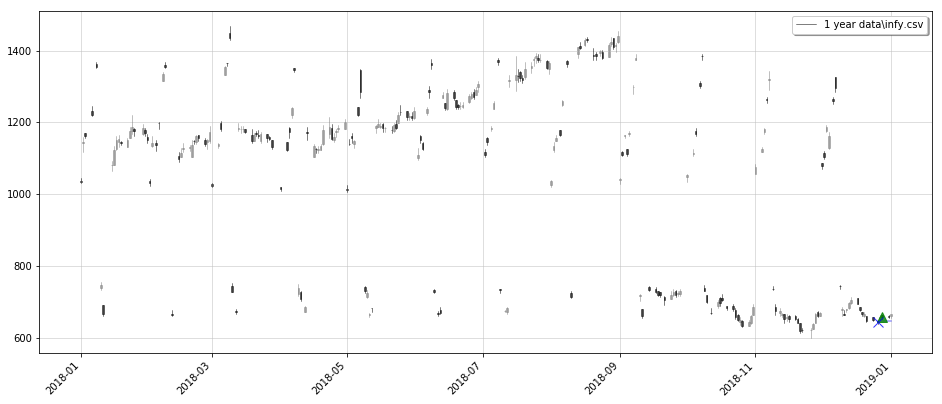

-----------------------------------------------------------------------
-----------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      390.00      392.50     388.50       389.95    0.000000   
2018-01-02      419.60      422.20     410.40       417.90    0.000000   
2018-01-03      379.00      382.75     377.65       381.50   -1.343997   
2018-01-06      174.10      175.65     171.20       172.35   -1.343997   
2018-01-08      166.20      169.00     166.00       168.00   -1.343997   
2018-01-10      153.00      155.00     150.00       153.95   -1.343997   
2018-01-11      139.75      142.95     139.00       141.85   -1.343997   
2018-01-15      389.70      396.20     389.70       390.85   -1.343997   
2018-01-16      390.00      391.50     383.40       384.15    1.231839   
2018-01-17      383.90      387.75     374

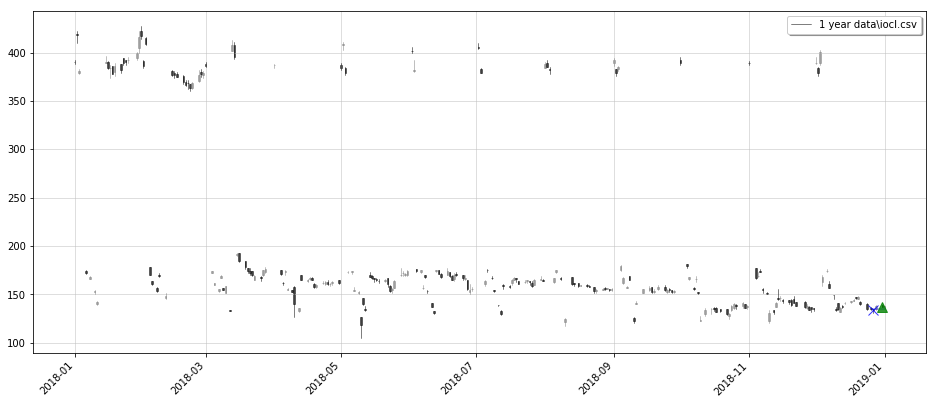

-----------------------------------------------------------------------
-----------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      177.05      177.35     175.70       176.55    0.000000   
2018-01-02      169.25      169.80     167.40       169.05    0.000000   
2018-01-03      163.70      163.75     162.00       163.00    0.000000   
2018-01-06      167.50      167.50     163.70       164.35    0.000000   
2018-01-08      154.80      156.00     152.75       155.35    0.000000   
2018-01-10      167.50      170.30     166.15       169.60    0.000000   
2018-01-11      159.75      160.25     156.75       157.00    0.000000   
2018-01-15      173.00      175.40     171.80       172.95    0.000000   
2018-01-16      173.60      174.60     170.60       173.25    0.000000   
2018-01-17      173.20      174.85     170

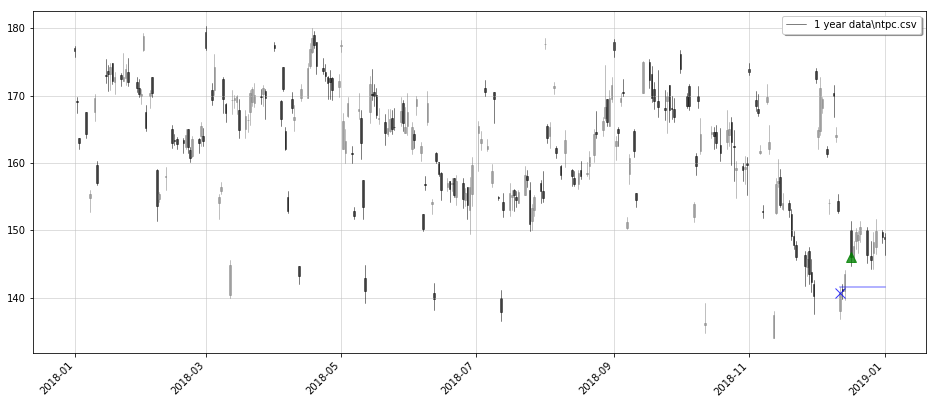

-----------------------------------------------------------------------
-----------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      310.60      312.75     306.30       307.10    0.000000   
2018-01-02      316.90      317.40     305.00       306.05    0.000000   
2018-01-03      266.30      270.00     261.25       262.15    0.000000   
2018-01-06      269.25      269.80     264.60       266.70    0.000000   
2018-01-08      294.50      298.00     288.35       295.10    0.000000   
2018-01-10      265.50      275.20     264.10       273.85    0.000000   
2018-01-11      283.00      289.00     278.85       285.90    0.000000   
2018-01-15      303.95      305.25     301.55       302.60    0.000000   
2018-01-16      302.40      303.35     295.30       296.15    0.000000   
2018-01-17      296.00      308.40     292

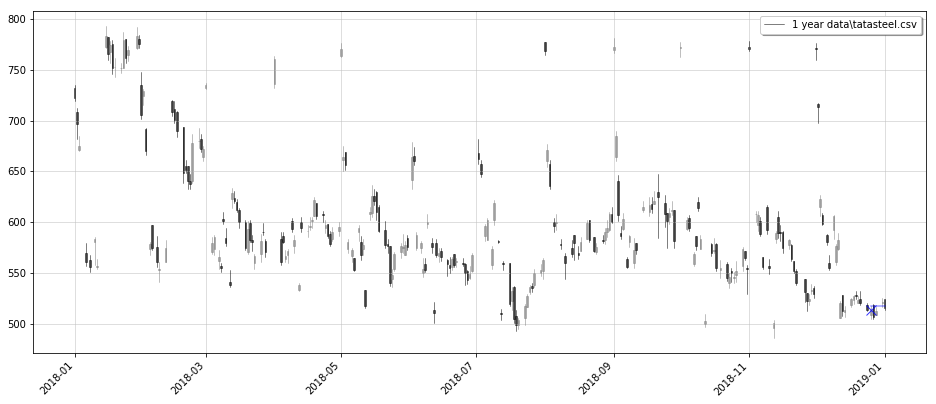

-----------------------------------------------------------------------
-----------------------------------------------------------------------
            Open Price  High Price  Low Price  Close Price  high_slope  \
Date                                                                     
2018-01-01      311.50      320.00     309.45       316.55    0.000000   
2018-01-02      305.05      309.10     300.00       300.75    0.000000   
2018-01-03      292.80      294.10     291.20       292.50    0.000000   
2018-01-06      262.95      264.50     259.05       260.60    0.000000   
2018-01-08      276.00      278.50     273.70       277.35    0.000000   
2018-01-10      324.00      332.45     323.00       330.15    0.000000   
2018-01-11      332.95      332.95     322.50       329.65    0.000000   
2018-01-15      318.85      324.25     313.40       315.00    0.000000   
2018-01-16      316.90      334.00     316.00       331.95    0.000000   
2018-01-17      333.00      333.50     325

In [3]:
for file_name in glob.glob('1 year data/*.csv'):
    price_data = read_data(file_name)
    #print(price_data)
    #vasu.plot_candlestic(price_data,file_name)
    
    trend_data = vasu.get_trend_data(price_data)
    train_data,test_data = vasu.split_data(trend_data)
    peak_info =  vasu.get_latest_peak_info(train_data)
    peak_type = peak_info['peak_type']
    peak_data = peak_info['peak_data']
    peak_date = peak_data.index.to_pydatetime()[0]
    
    trend_before_peak = peak_data['trend'].values[0]
    peak_high_slope = peak_data['high_slope'].values[0]
    peak_low_slope = peak_data['low_slope'].values[0]
    peak_high = peak_data['High Price'].values[0]
    

    if (peak_type == 'low') and (trend_before_peak != 'bullish') and (peak_low_slope < 0.0):
        high_mark_price = peak_high
        signal_data = test_data[test_data['Close Price'] > peak_high][1:2].copy()

        if len(signal_data) > 0:
            print('Buy!')
            print('Benchmark Price is : %.2f' % peak_high)
            print('Signal Date is : %s' % signal_data.index.to_pydatetime()[0])
            print('Closing Price on signal is : %.2f' % signal_data['Close Price'].values)
            l.append(file_name)
    
        signal_to_end_data = trend_data.loc[peak_date:].copy()
        signal_to_end_data['benchmark price'] = peak_high
        benchmark_series = signal_to_end_data['benchmark price']
    
        fig, ax = plt.subplots(figsize = (16,7))
        fig.subplots_adjust(bottom=0.2)

        quotes = zip(mdates.date2num(price_data.index.to_pydatetime()),price_data[u'Open Price'], 
                             price_data[u'High Price'],price_data[u'Low Price'], price_data[u'Close Price'])
        candlestick_ohlc(ax,quotes,width=0.75,colorup='grey',colordown='black' ,alpha=0.5)

        plt.plot(benchmark_series, "-", color='blue', alpha = 0.4)
        plt.plot(signal_data['Close Price'], "^", color='green',markersize=10,alpha = 0.8)
        plt.plot(peak_data['Close Price'], "x", color='b',markersize=10, alpha = 0.8)

        ax.xaxis_date()
        ax.legend([file_name],loc='upper right', shadow=True, fancybox=True)
        ax.autoscale_view()
        plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

        plt.rc('axes', grid=True)
        plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)
        plt.show()
        print('-----------------------------------------------------------------------')
print('-----------------------------------------------------------------------')

for i in l:
    print(i)    